Plotting multiple samples
=========================

Contents:
- [Notebook set-up](#notebook-set-up)
- [Initializing MaP sample](#initializing-map-sample)
- [ShapeMapper QC](#shapemapper-qc)
- [Skyline plots](#skyline-plots)
- [Arc Plots](#arc-plots)
- [Secondary Structure](#secondary-structure)

Notebook set-up
---------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline

# Import module. For high-level functions, no additional modules are needed
import plotmapper as MaP

# Creates an HTML button that hides/shows code cells
# Useful for lab notebook reports and research updates
# Note: This works in html and jupyter notebooks
#   but not github markdown (where you are likely looking.)
MaP.create_code_button()

Initializing MaP sample
-----------------------
If you have consistently named files, you can use a function to create a list of samples quickly.

In [2]:
path = 'data/'
def init_sample(sample):
    return MaP.Sample(sample       = sample,                              # Sample name, this will appear in labels and legends.
                      profile      = path+sample+"_rnasep_profile.txt",   # ShapeMapper2 profile.txt
                      ct           = path+"RNaseP.ct",                    # base-pairing information in ct format, this may be redundant if a secondary structure file is provided.
                      ss           = path+"RC_CRYSTAL_STRUCTURE.xrna",    # secondary structure drawing in xrna, varna, cte, or nsd format
                      rings        = path+sample+"-rnasep.corrs",         # RingMapper output (extension specified by user)
                      pairs        = path+sample+"-rnasep-pairmap.txt",   # PairMapper output (pairmapper.txt)
                      # allcorrs = PairMapper allcorrs.txt file, not included in this example
                      log          = path+sample+"_shapemapper_log.txt",  # ShapeMapper2 log file contains fragment length and mutations-per-molecule distributions
                                                                          # but only if --per-read-histograms flag is used
                      dance_prefix = path+sample+"_rnasep",               # prefix for DanceMapper files, will detect rings, pairs, profiles, and predicted structures if present.
                      deletions    = path+"example-rnasep-deletions.txt", # ShapeJumper deletions.txt file
                      fasta        = path+"RNaseP-noSC.fasta",            # Fasta file used for ShapeJumper (required if deletions are provided)
                      pdb          = path+"3dhs_Correct.pdb",             # a 3-D molecular structure in PDB format, support for cif and pdbx files forthcoming.
                      pdb_kwargs   = {"chain":"A"})                       # Additional info for PDB parsing. Chain is required.
                                                                          # offset and fasta may be required if the PDB header is incomplete.

samples = [init_sample(n) for n in ["example1", "example2", "example3", "example4"]

ShapeMapper QC
--------------

This plot is ugly. It will look better in the future, but the function call will stay the same.
- Mutations per Molecule, separated by modified and untreated
- Read length distribution, separated by modified and untreated
- Boxplot of Mutation rates, colored by modified and untreated

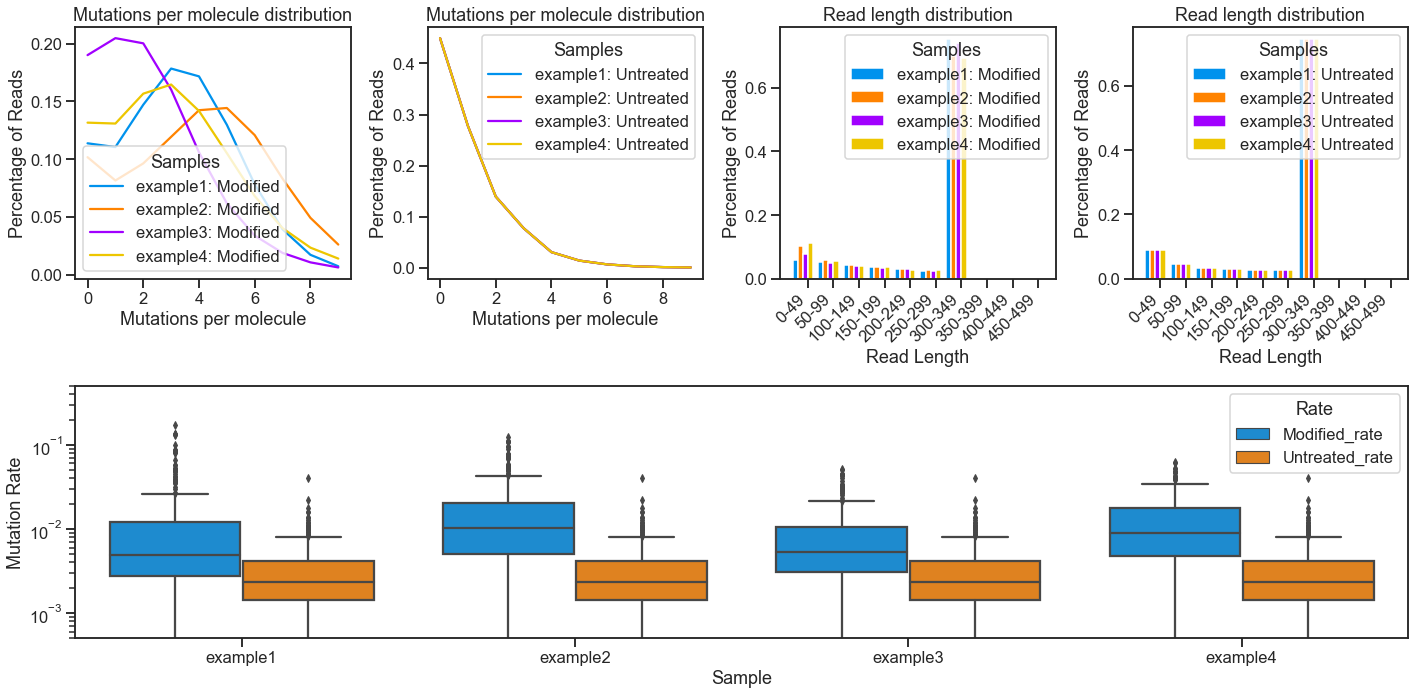

In [3]:
MaP.array_qc(samples)

Skyline Plots
-------------
Each sample is plotted on the same skyline.

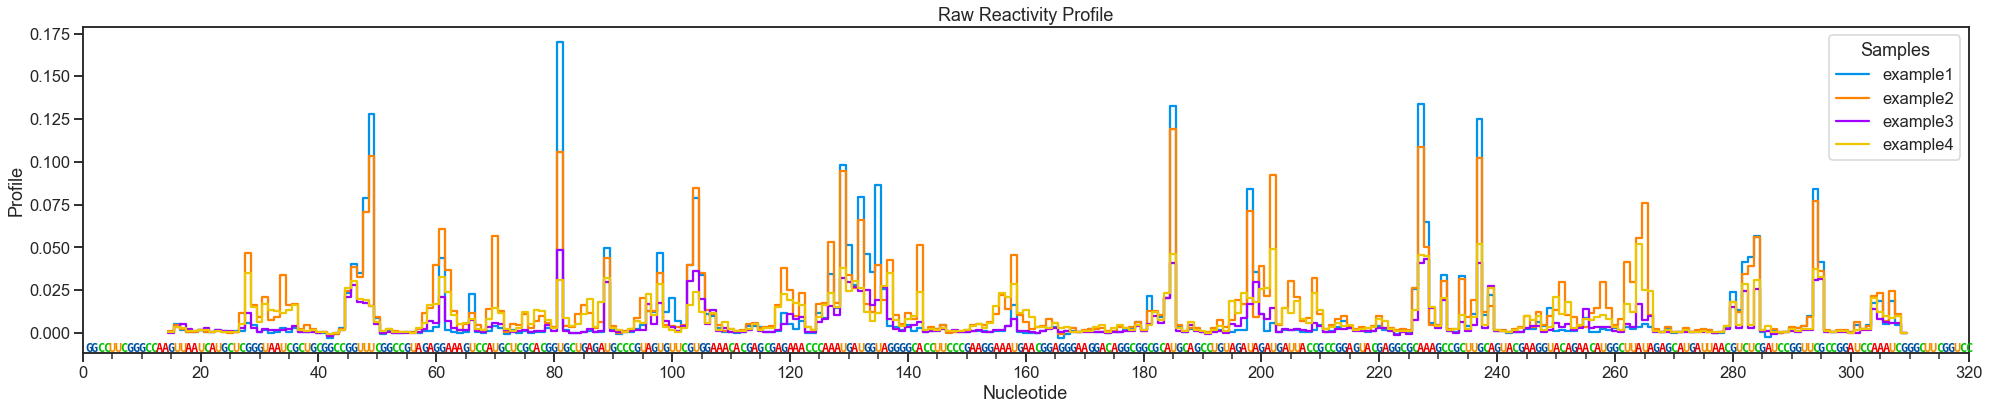

In [4]:
MaP.array_skyline(samples)

In [5]:
#not working
#samples[0].make_regression(samples[1])

Arc Plots
---------

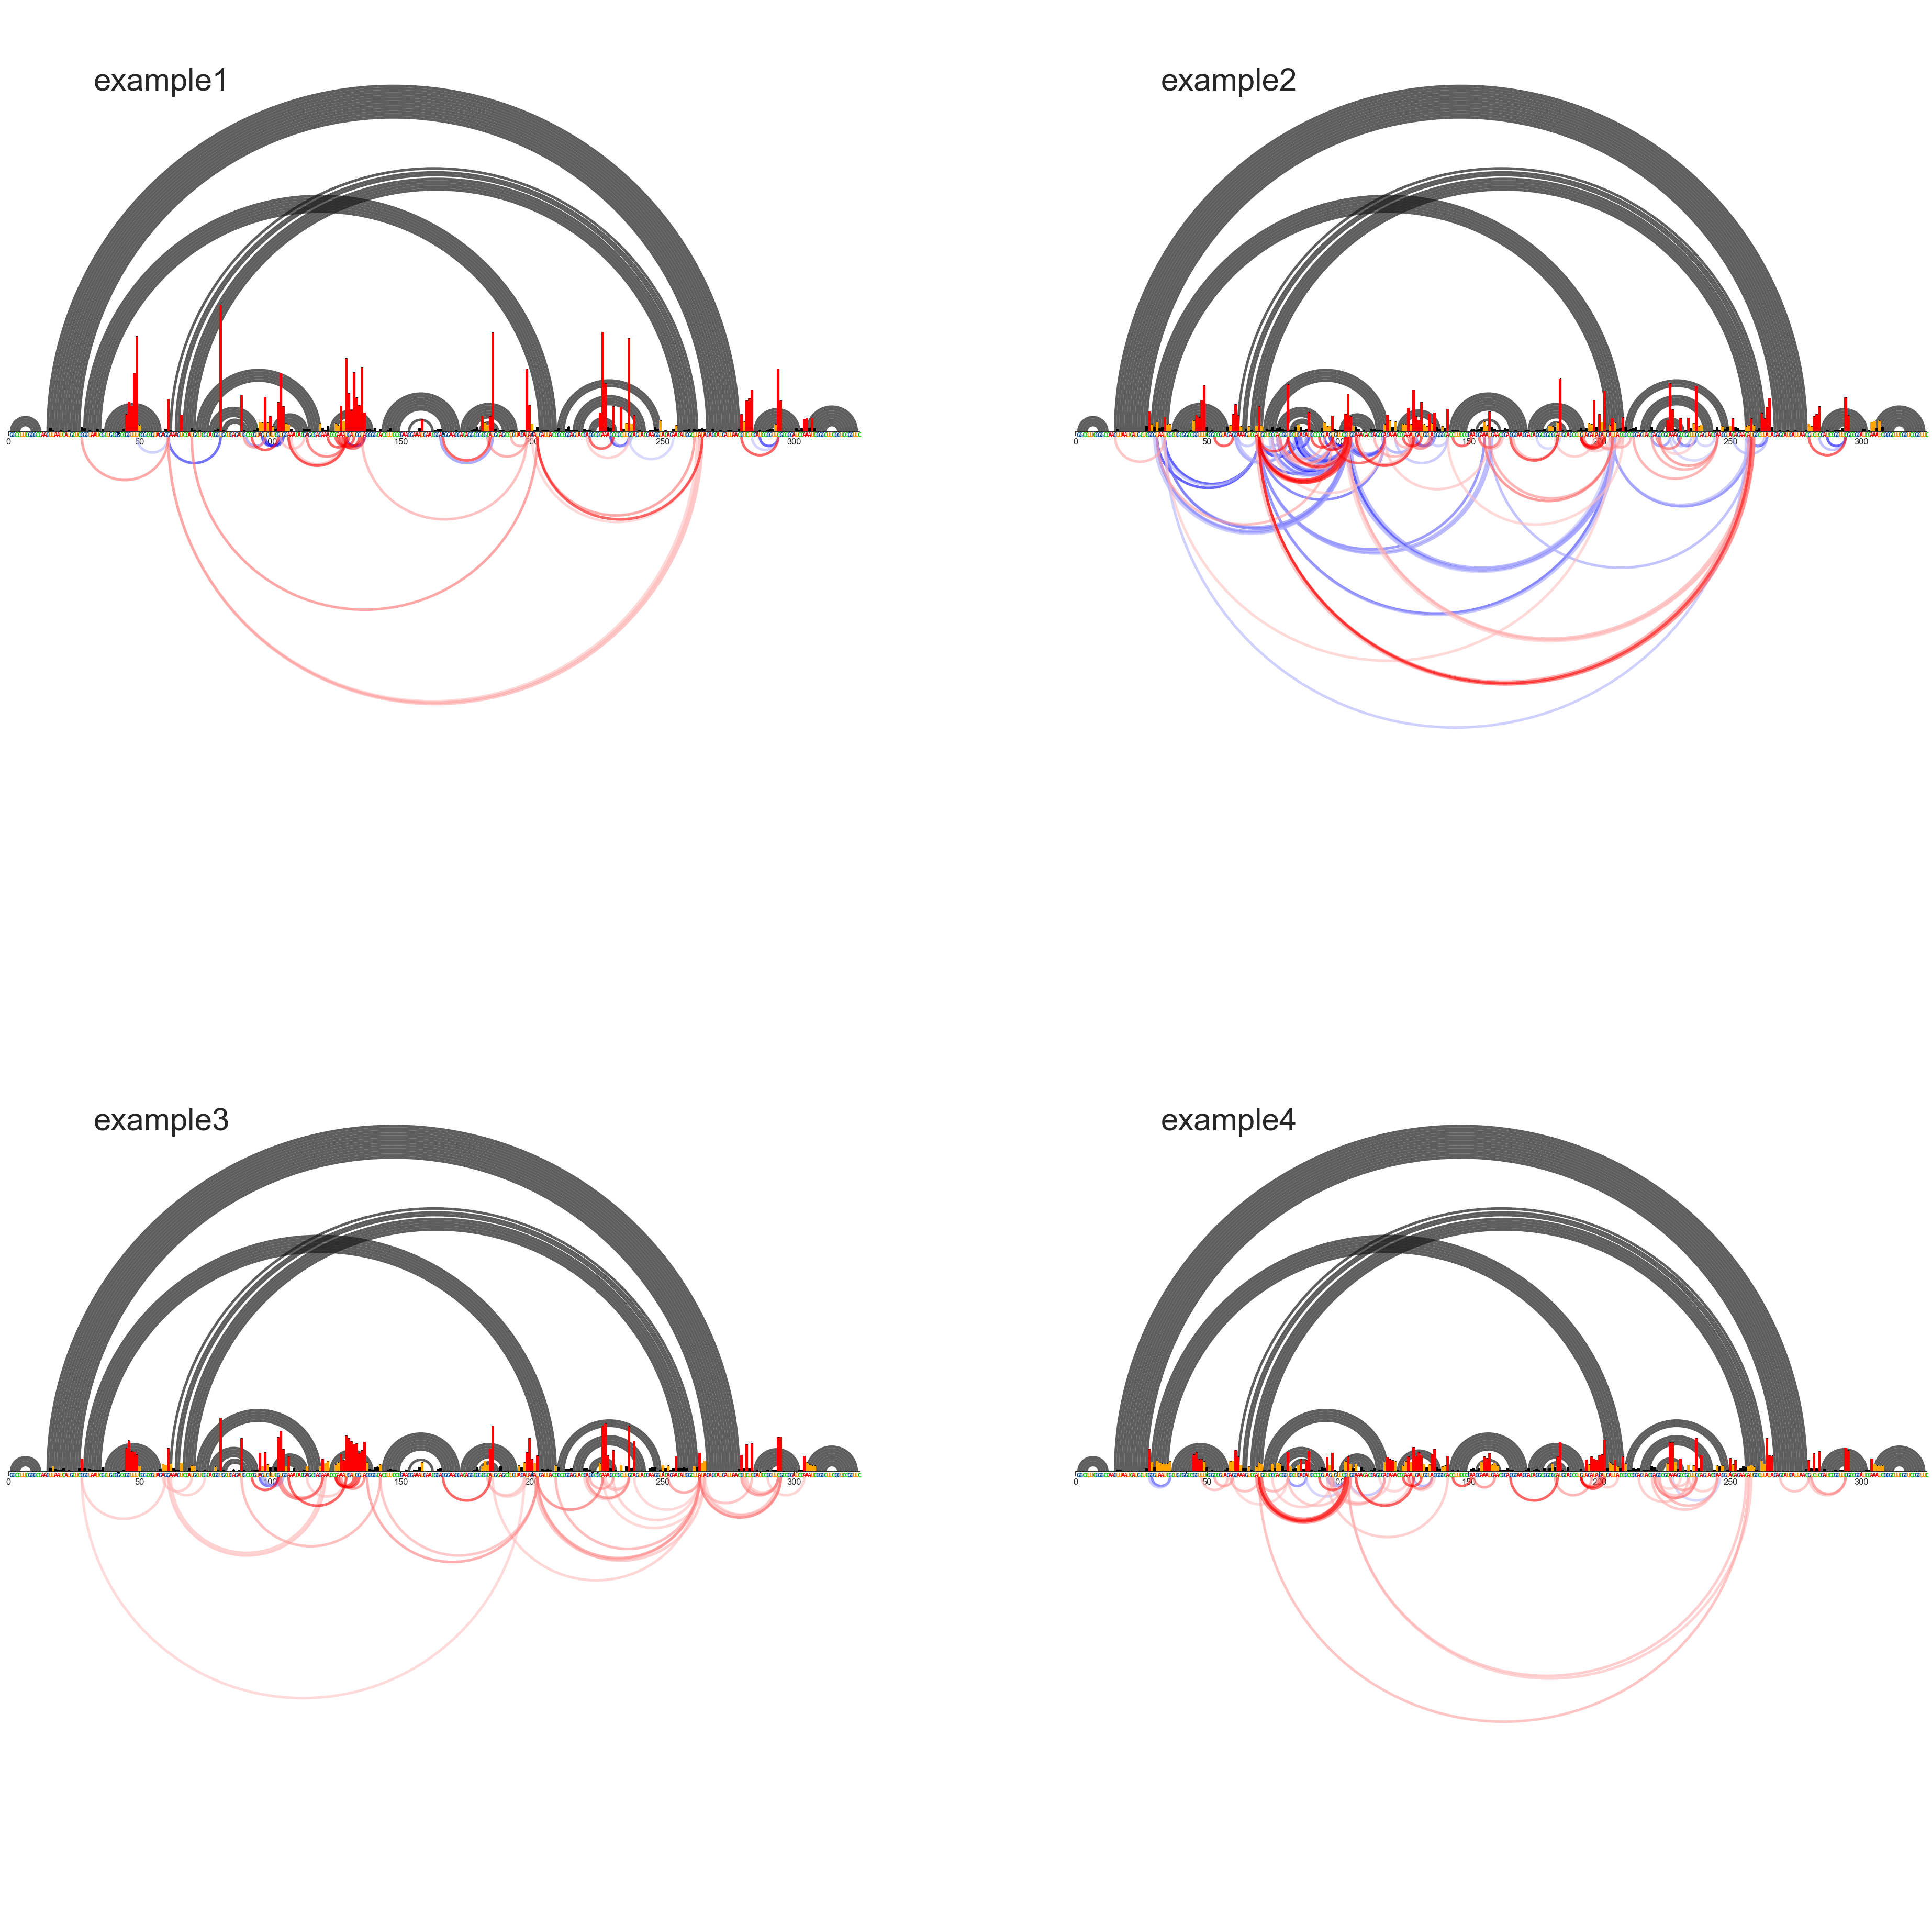

In [6]:
MaP.array_ap(samples, ij="rings", cdBelow=30)

Secondary Structure
-------------------

In [7]:
MaP.array_ss(samples, ij="rings", cdAbove=15, Statistic=15)

TypeError: add_data() missing 3 required positional arguments: 'ij', 'profile', and 'label'

## 3D structures

In [ ]:
MaP.array_3d(samples, ij_data="pairs")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol